# 문제 정의

* 어떤 데이터가 이적료 가격(value에 해당되는 데이터)에 영향을 많이 미치는가를 알아보고, 선수의 이적료를 예측해보자.

## 이적료 배경지식

* 1880년대 영국의 잉글랜드 축구협회가 선수들의 무분별한 이동을 막기 위해 처음 도입함.
* 이적료는 선수를 영입하는 구단이 원 소속구단에 지급하는 돈이다.선수와 원 소속구단 사이에 최소 6개월 이상의 계약기간이 남아 있어야 팀을 옮길 때 이적료가 발생한다.
* 스타의 경우 ‘조건’을 내거는 경우가 있다. ‘팀을 옮기게 되면 이적료 일부를 선수에게 지급한다’는 등의 옵션을 두는 방식이다. 또 예외적으로 보너스 형식으로 이적료 일부를 선수가 요구하기도 한다. 그러나 이적료 중 선수 몫은 5%를 넘지 않는다.
* 지금 받고 있는 연봉과 선수의 나이 등 현재와 미래 가치를 종합적으로 고려한 금액이 책정한다. 예를들어, 32살이 돼서 이적할 때보다 27살이 됐을 때 훨씬 이적료가 높게 책정됨.
*한국의 k리그도 FIFA의 이적료 계산 공식을 따른다.

## FA 이적료 계산 공식

* 국내 구단 간 이적 시 이적료 = (X+Y+Z)÷3×(연령별 계수)

* X는 기존 구단에서 받았던 연봉. Y는 기존 구단이 제시한 연봉, Z는 영입할 구단이 제시한 연봉.

<br>

* 국외 구단 경유 이적 시 이적료 = (X+Y)÷2×(연령별 계수)

* X는 국외 이적 전 최종 구단에서 받았던 연봉, Y는 영입 구단에서 제시한 연봉

## 연령별계수표
  연령    |	계수
<p>만19세~21세	8
<p>만22세~24세	6
<p>만25세~27세	4
<p>만28세~30세	3
<p>만31세~33세	2
<p>만34세 이상	0

<br>

가령 2003년에 입단한 A선수가 현재구단에서 1억원을 받았는데 앞으로 1억 2천만원을 제시했고, 영입할 구단은 1억4천만원을 제시한 상황에서, A선수의 나이가 만 28세라면 연령별 계수가 3이 적용되어 [1억+1.2억+1.4억]÷3×3=3.6억의 이적료가 발생한다.

출처<p>
http://www.munhwa.com/news/view.html?no=2015123001033439179001<p>
https://magazine.hankyung.com/business/article/202102246709b<p>
https://www.chosun.com/sports/world-football/2022/08/18/3EAZZJ65V5D5BNUZGPQDSLKJQY/<p>
https://footballk.net/mediawiki/FA_%EC%9D%B4%EC%A0%81%EB%A3%8C_%EA%B3%84%EC%82%B0%EA%B3%B5%EC%8B%9D<p>


In [ ]:
# 나눔 폰트 설치하기
# 설치 후 런타임 다시 시작하기 권장
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 경로 변경

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 경로 변경
%cd ''

In [ ]:
# 경로 확인
%pwd

# 라이브러리 준비

In [ ]:
import numpy as np
import pandas as pd

# 시각화(visualization) 도구
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as plb
import seaborn as sns

# 경고 제어
import warnings
warnings.filterwarnings(action='ignore') # 경고창 끄기

In [ ]:
# matplotlib에 한글 폰트 적용 시키는 작업

# 브라우저에서 바로 그려지도록하는 명령어 적용
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

**리더보드**<p>
* 평가 산식 : RMSE

<br>

**데이터 설명**

1. FIFA_train.csv / FIFA_test.csv<p>
 id : 선수 고유의 아이디<P>
 name : 이름<P>
 age : 나이<P>
 continent : 선수들의 국적이 포함되어 있는 대륙입니다<P>
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다<P>
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등<P>
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발<P>
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수<P>
 stat_overall : 선수의 현재 능력치 입니다.<P>
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.<P>
 stat_skill_moves : 선수의 개인기 능력치 입니다.<P>
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.<P>

<br>

2. submission.csv (제출 파일 형식)<p>
  id : 선수 고유의 아이디<p>
  value : 예측된 선수 이적 시장 가격을 기입 <p>

In [ ]:
import pandas as pd

train = pd.read_csv('00_original_data/FIFA_train.csv')
test = pd.read_csv('00_original_data/FIFA_test.csv')
submission  = pd.read_csv('00_original_data/submission.csv')

In [ ]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [ ]:
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [ ]:
submission

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0


# 데이터 분석

## 데이터의 정보 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


* 정수, 실수, 문자 데이터로 이루어져있다.
* 결측치는 없는 것으로 확인된다.


## 데이터의 다음 통계값을 추출

* describe을 사용하면 수치형 데이터의 다음 통계값을 추출할 수 있다.<p>
  count : 개수<p>
  mean : 평균<p>
  std : 표준 편차<p>
  min : 최솟값<p>
  25% : 제 1사분위값<p>
  50% : 중앙값, 중위값<p>
  75% : 제 3사분위값<p>
  max : 최댓값<p>

* 범주형 데이터의 경우 include='O'를 추가하여 확인할 수 있으며, 이 경우에는 범주의 개수, 상위 범주, 빈도수 등을 제공하고 있다.

In [ ]:
# 수치형 데이터의 통계값 추출
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [ ]:
# 범주형 데이터의 통계값 추출
train.describe(include='O')

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


In [ ]:
test.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


## 그래프로 확인해보기

**조사결과**

* 선수의 나이, 계약기간, 선수의 능력치를 주로 고려하고 있을 가능성이 크것으로 추정한다. 이것을 바탕으로 시각화를 통해 유의미한 feature들을 살펴보자.

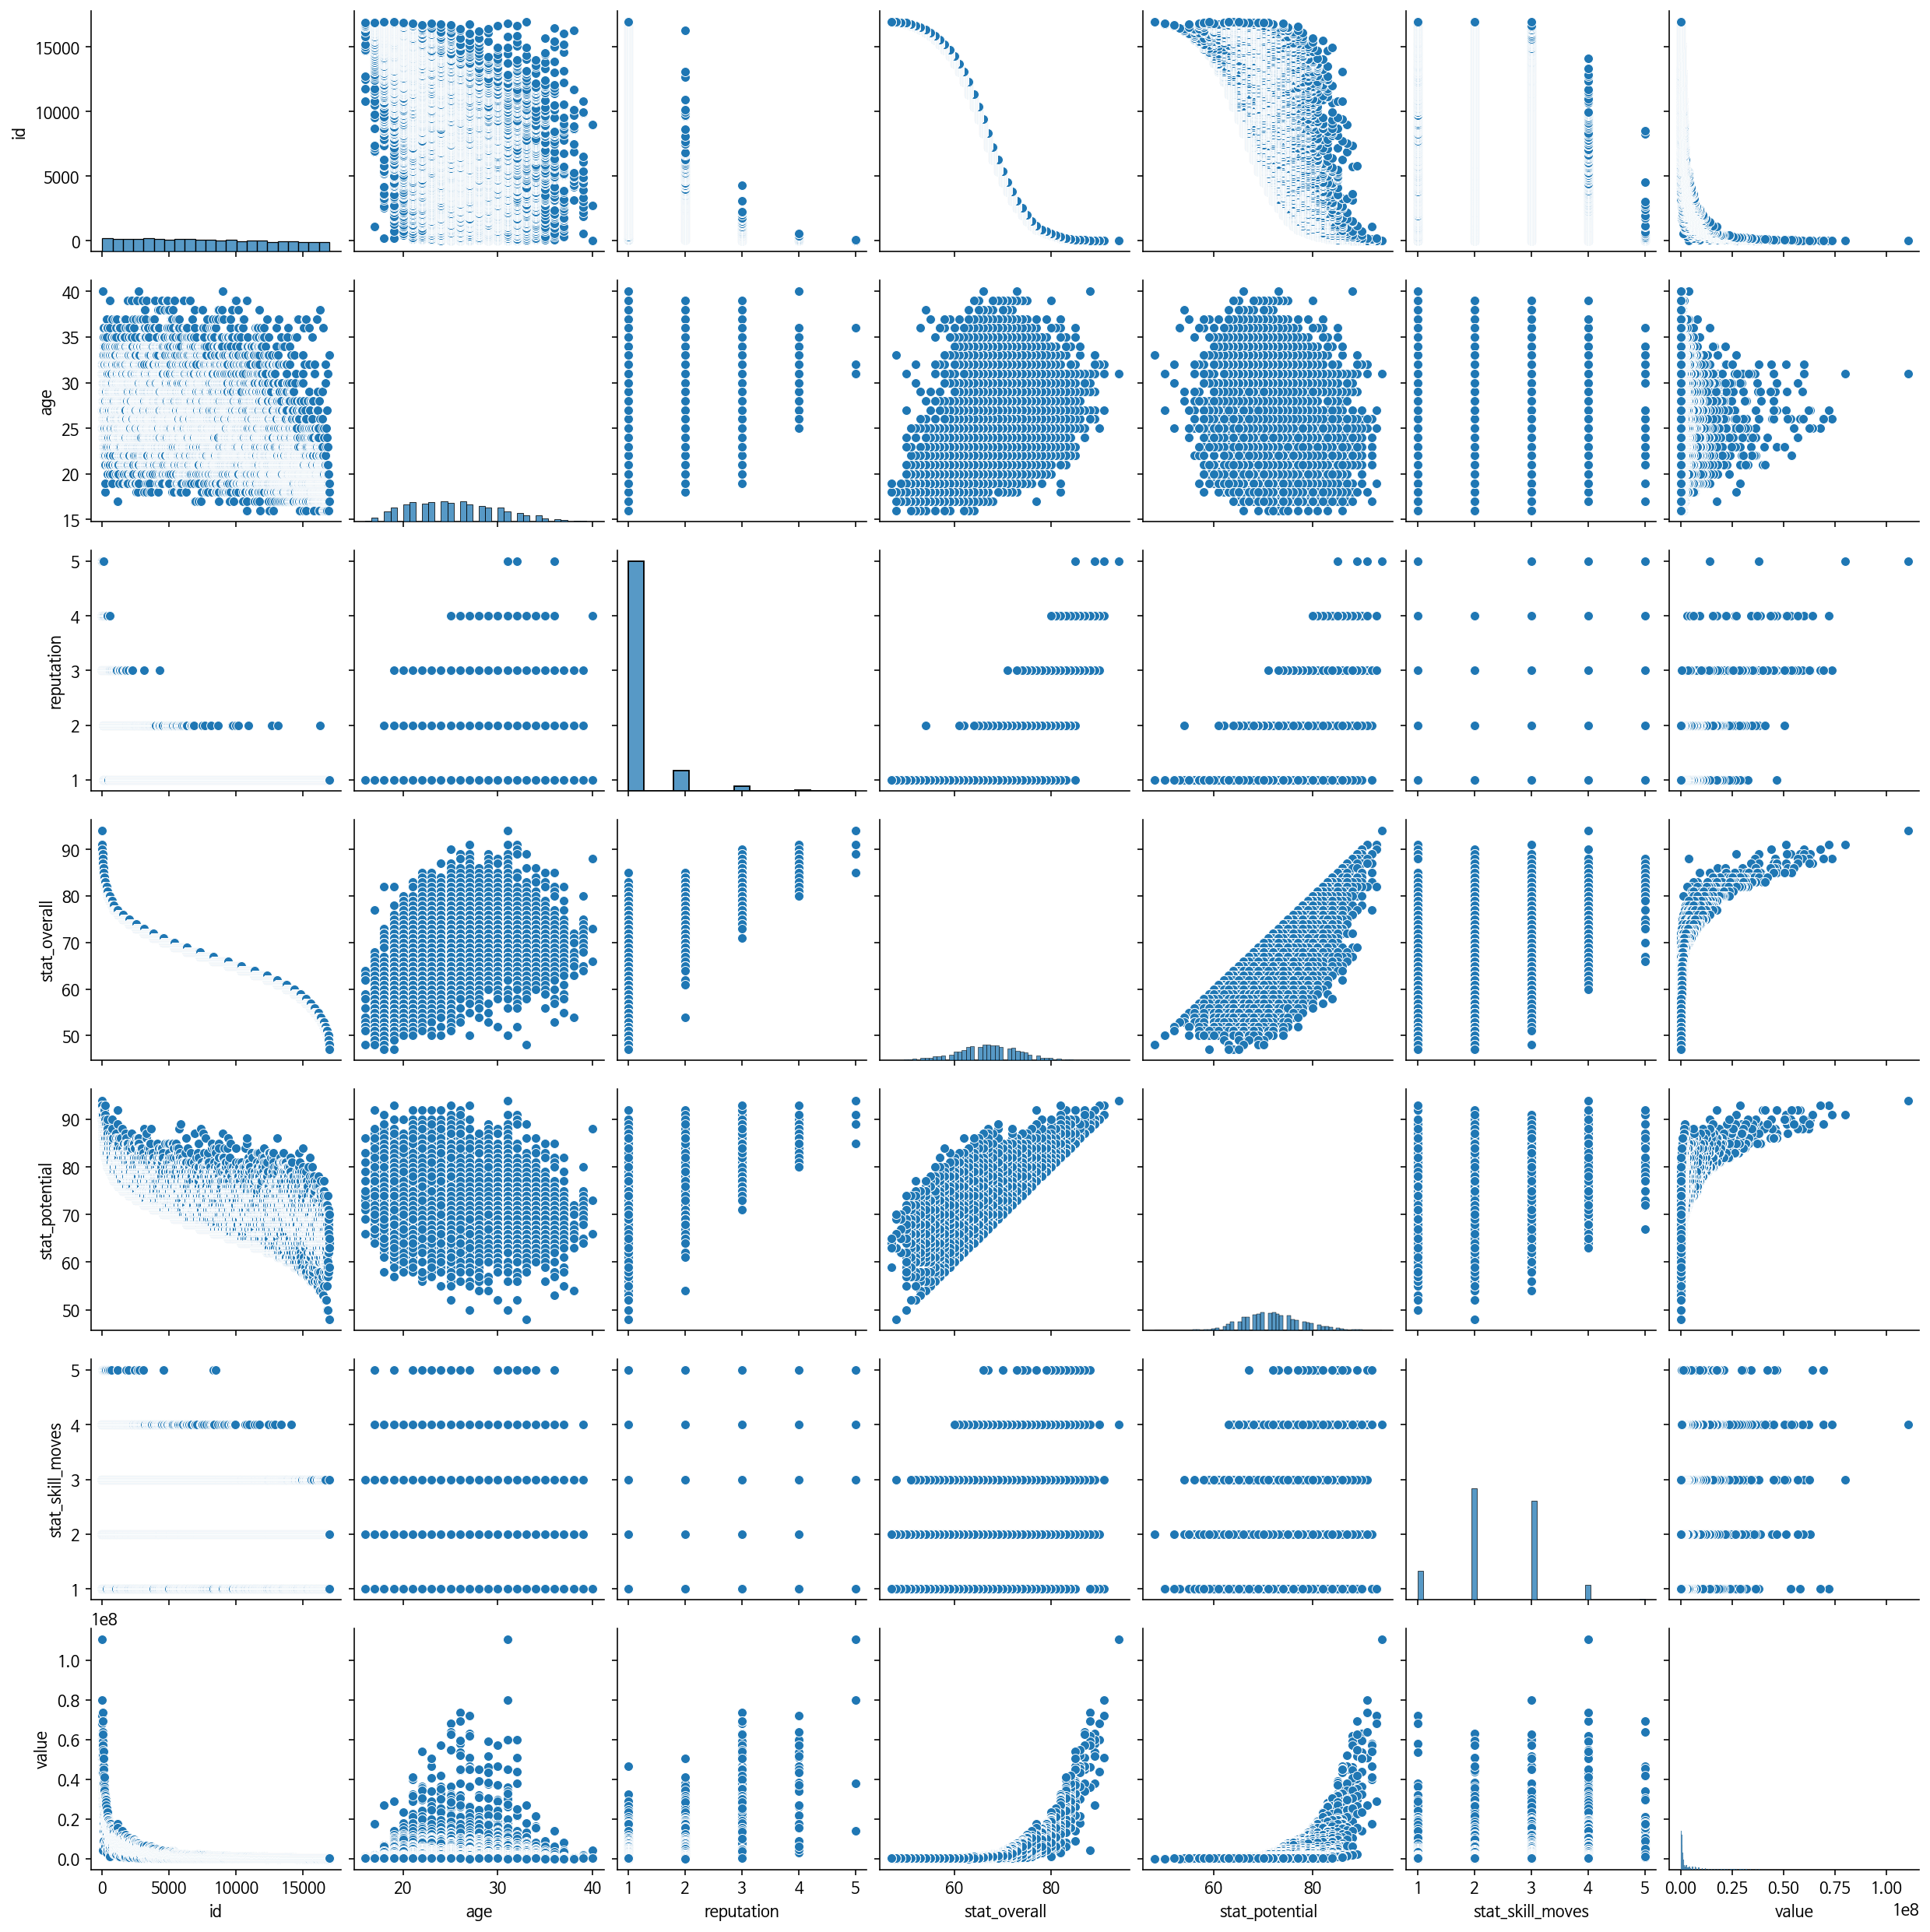

In [ ]:
# 독립변수와 종속변수의 관계를 스캐터플롯(scatter plot)으로 살펴보자.
sns.pairplot(train)
plt.show()

### 이적료 예측이 우리가 해결하고자 하는 문제이므로, 이적료를 기준으로 다른 데이터들의 상관관계를 알아본다.

**데이터의 분포를 확인하는 시각화**
<br>

  데이터의 분포는 다음과 같이 살필 수 있으며, 대표적인 몇 가지만 살펴본다.
  * 범주형 : barplot
  * 수치형
    * 이산형 : barplot
    * 연속형 : kdeplot, histogram
  * 범주형 + 수치형 : boxplot, violinplot, etc, barplot
  * 수치형 + 수치형 : scatter

[Text(0.5, 1.0, '이적료_로그스케일 박스플롯')]

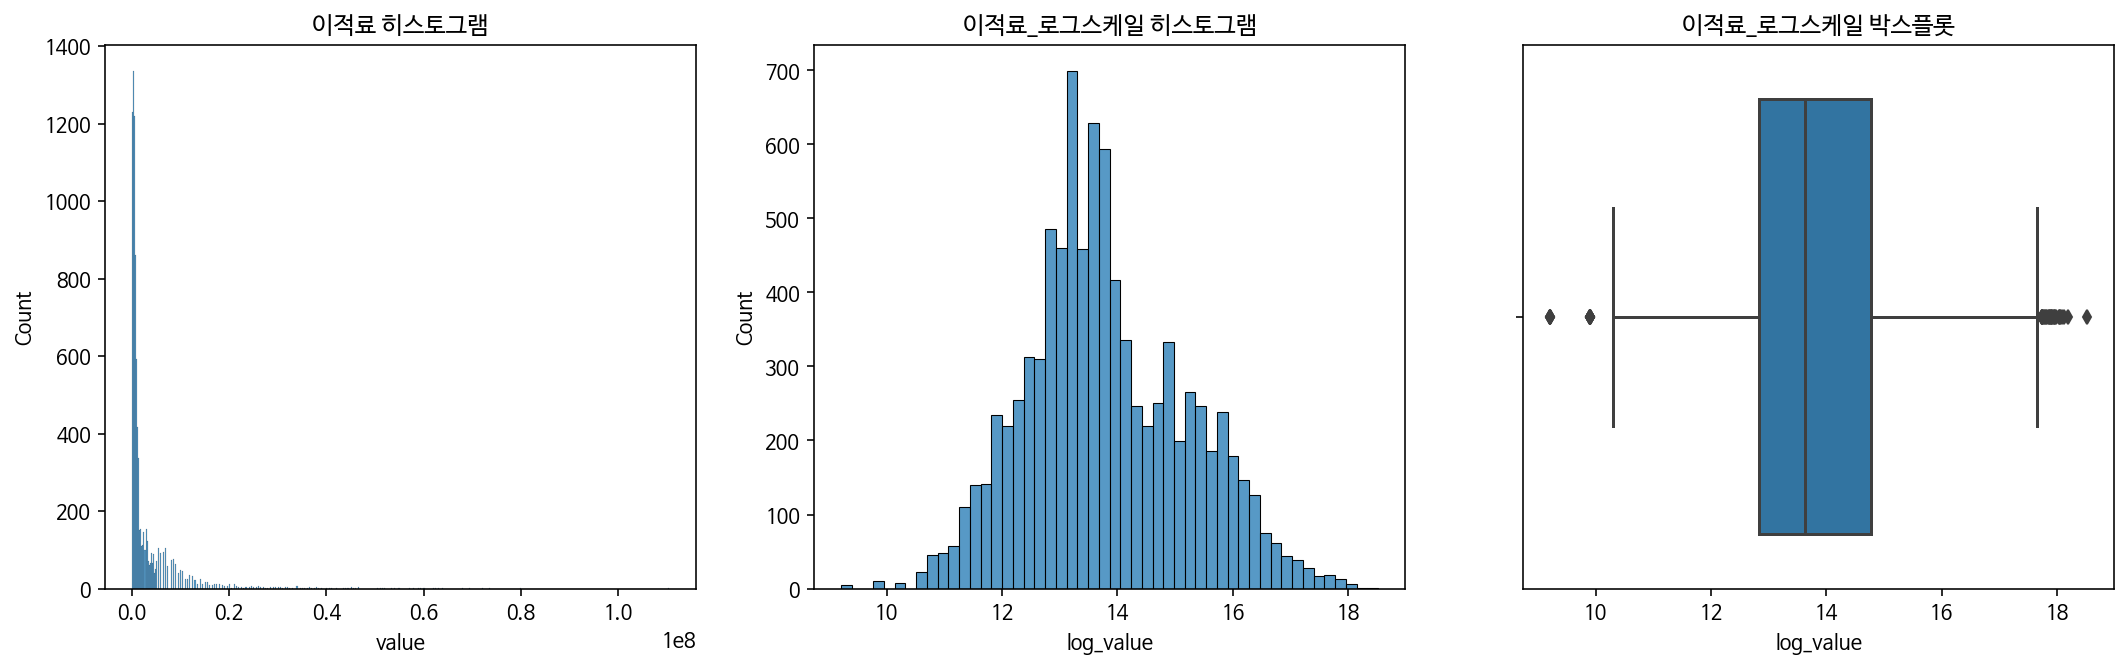

In [ ]:
# 도화지 그리기
# fig, axes = plt.subplots(1, 3, figsize=(18,5)) # 아래 코드와 같은 코드이다.
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

# 이적료에 log 적용
train["log_value"] = np.log(train["value"])

sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "이적료 히스토그램")
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "이적료_로그스케일 히스토그램")
sns.boxplot(x="log_value", data=train, ax=axes[2])
axes[2].set(title = "이적료_로그스케일 박스플롯")

* 이적 시장 가격의 편차가 매우 크기 때문에 log scale을 적용시킴
* 분석을 진행할때 log scale의 value도 target으로 시도해보면 좋을 것 같음
* log scale 후에도 이상치 발견, log scale 기준 10~18까지 데이터만 사용하면 좋을 것 같음

### 나이별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '나이'), Text(0.5, 1.0, '나이별 평균 이적료')]

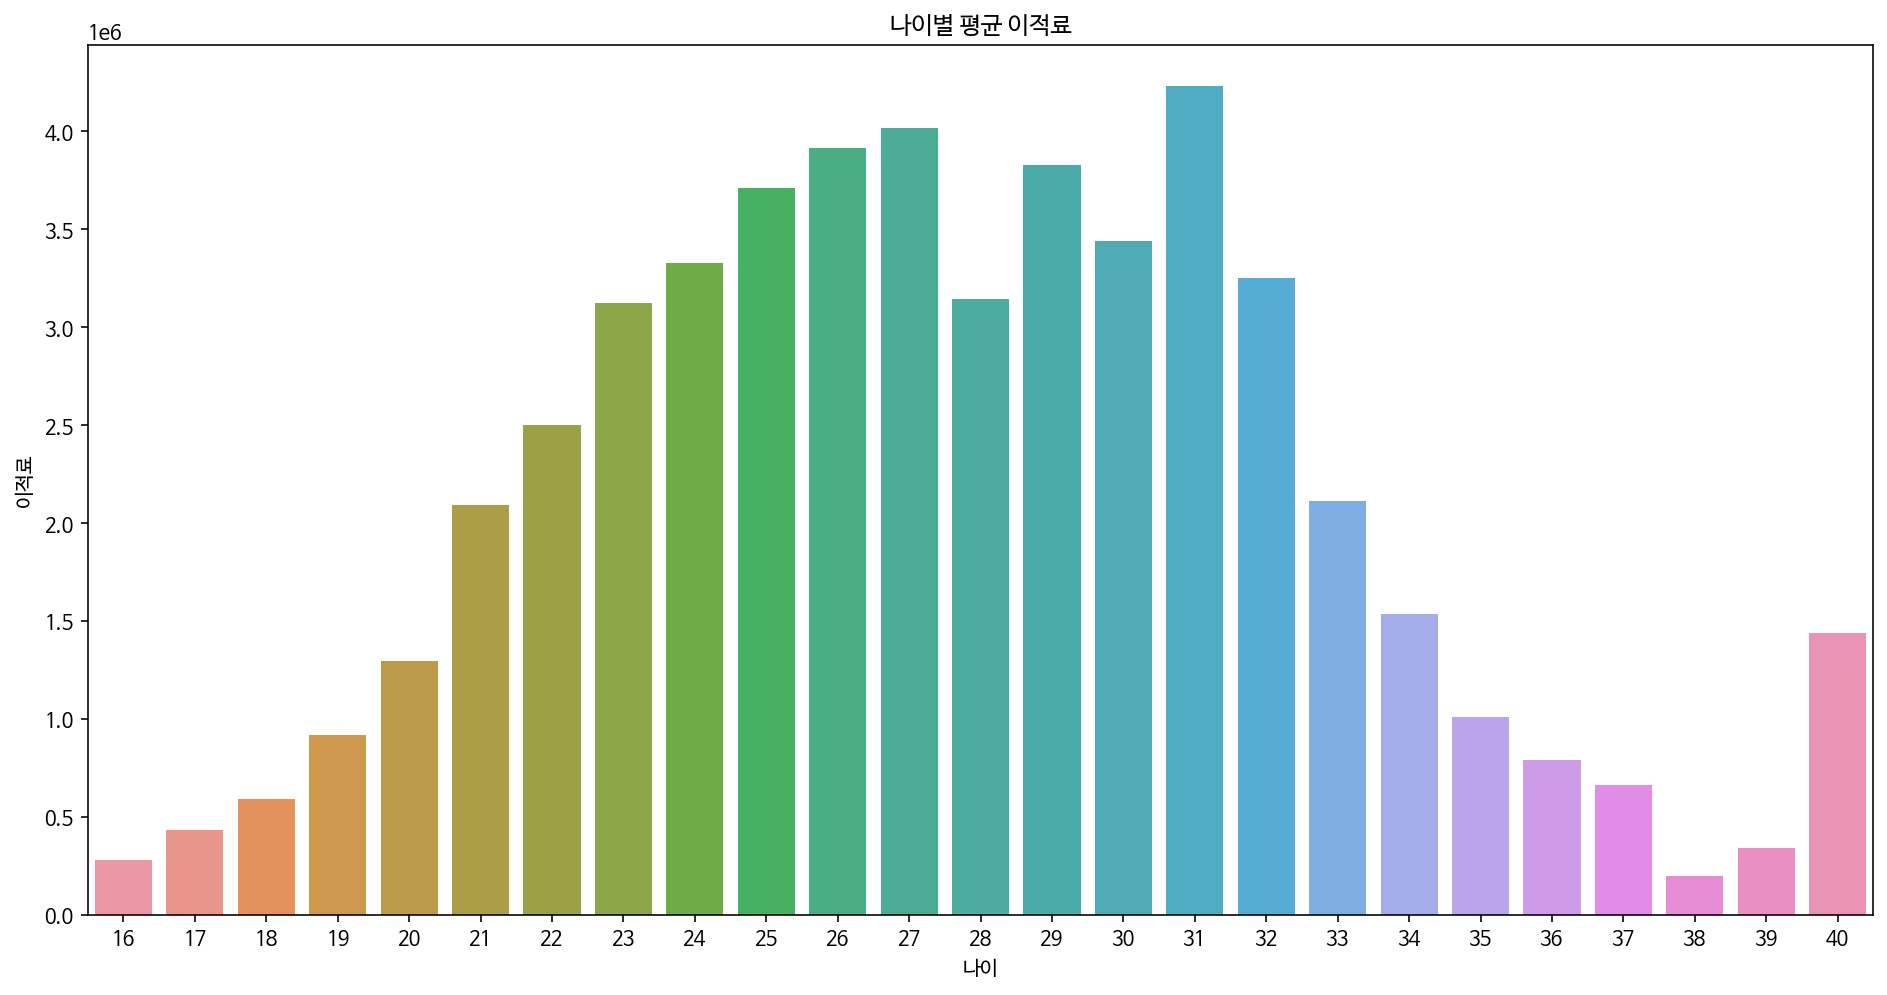

In [ ]:
# 도화지 그리기
# fig, axes = plt.subplots(1, 1, figsize=(16, 8)) # 아래 코드와 같은 코드이다.
fig, axe = plt.subplots()
fig.set_size_inches(16,8)


# 나이별 이적료
group_age_value = train.groupby("age")["value"].mean()
group_age_value = group_age_value.reset_index() # 순서가 섞인 인덱스를 다시 처음부터 재배열 해서 저장

# 나이별 이적료 막대 그래프
sns.barplot(x="age", y="value", data=group_age_value)

# 설정
axe.set(title = "나이별 이적료",
      xlabel="나이",
      ylabel="이적료")

* 이적료 조사 때와 같이 20대 ~ 30대 사이의 이적료가 높음 

### 계약 기간별 이적료

In [ ]:
# 다른 계약 연도와 다른 값이 있으므로,
# 계약 연도를 object -> int 로 변환
def func(string:object) -> int:
    # 계약 연도만 추출하여 int로 반환
    string = string[-4:] # 계약연도가 제일 끝에 있거나 단독으로 쓰이고 있어 뒤에서 4번째부터 가지고 옴
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

[Text(0, 0.5, '이적료'), Text(0.5, 0, '계약 기간'), Text(0.5, 1.0, '계약 기간별 평균 이적료')]

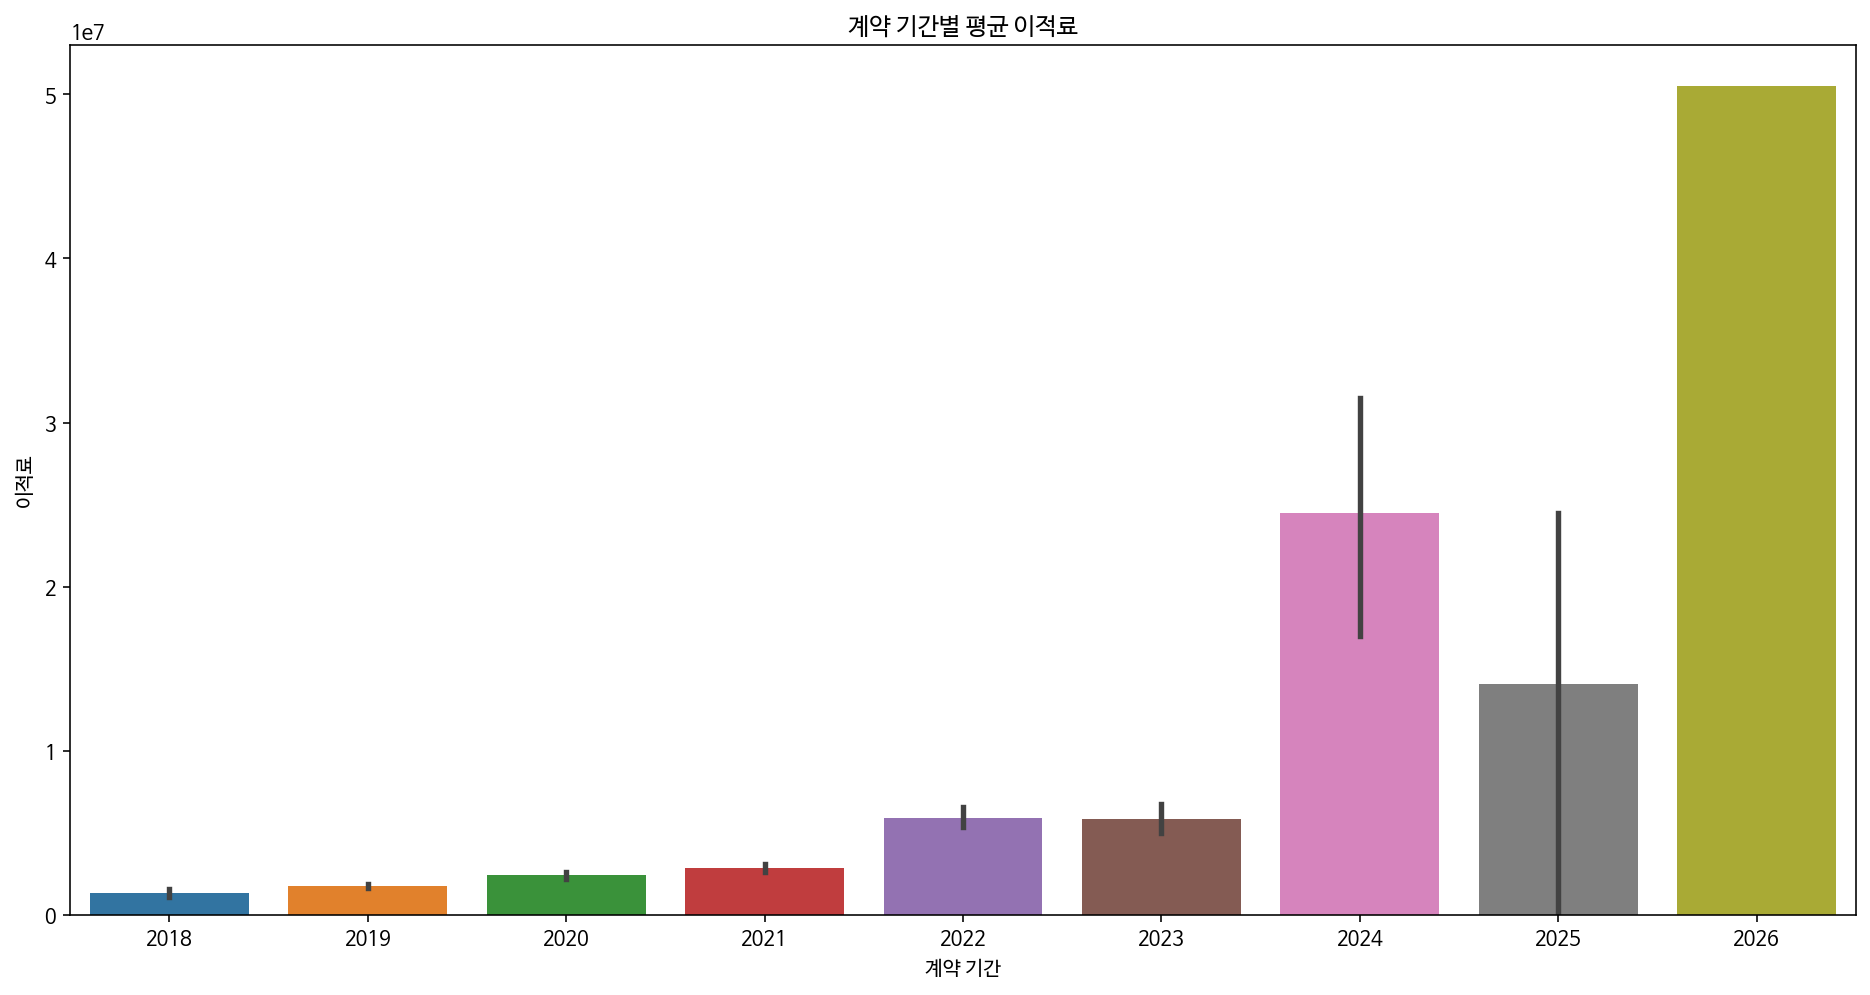

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 계약 기간별 이적료 막대 그래프
sns.barplot(x="contract_until", y="value", data=train)

# 설정
axe.set(title = "계약 기간별 이적료",
      xlabel="계약 기간",
      ylabel="이적료")

* 조사한 것과 같이, 계약기간의 여유가 많을 수록 이적료가 비싸짐

### 유명도별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '유명도'), Text(0.5, 1.0, '유명도별 평균 이적료')]

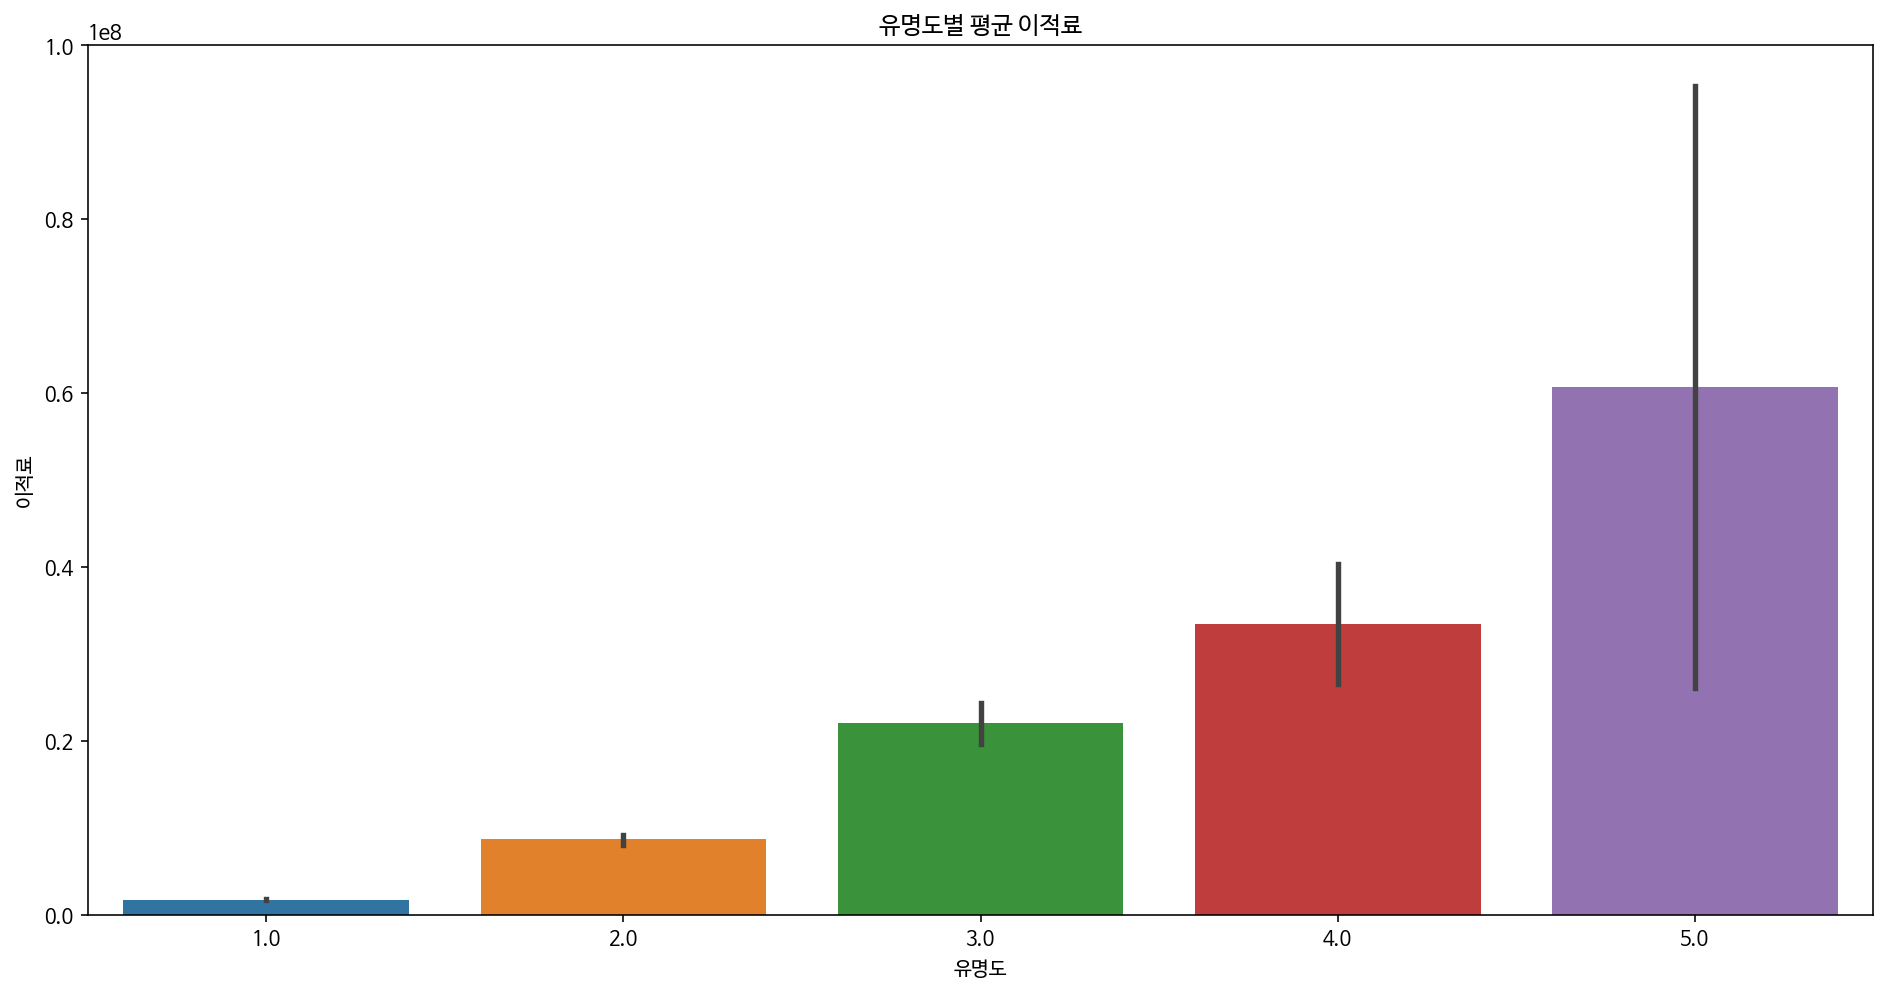

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 유명도별 이적료 막대 그래프
sns.barplot(x="reputation", y="value", data=train)

# 설정
axe.set(title = "유명도별 이적료",
      xlabel="유명도",
      ylabel="이적료")

### 현재 능력치별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '현재 능력치'), Text(0.5, 1.0, '현재 능력치별 평균 이적료')]

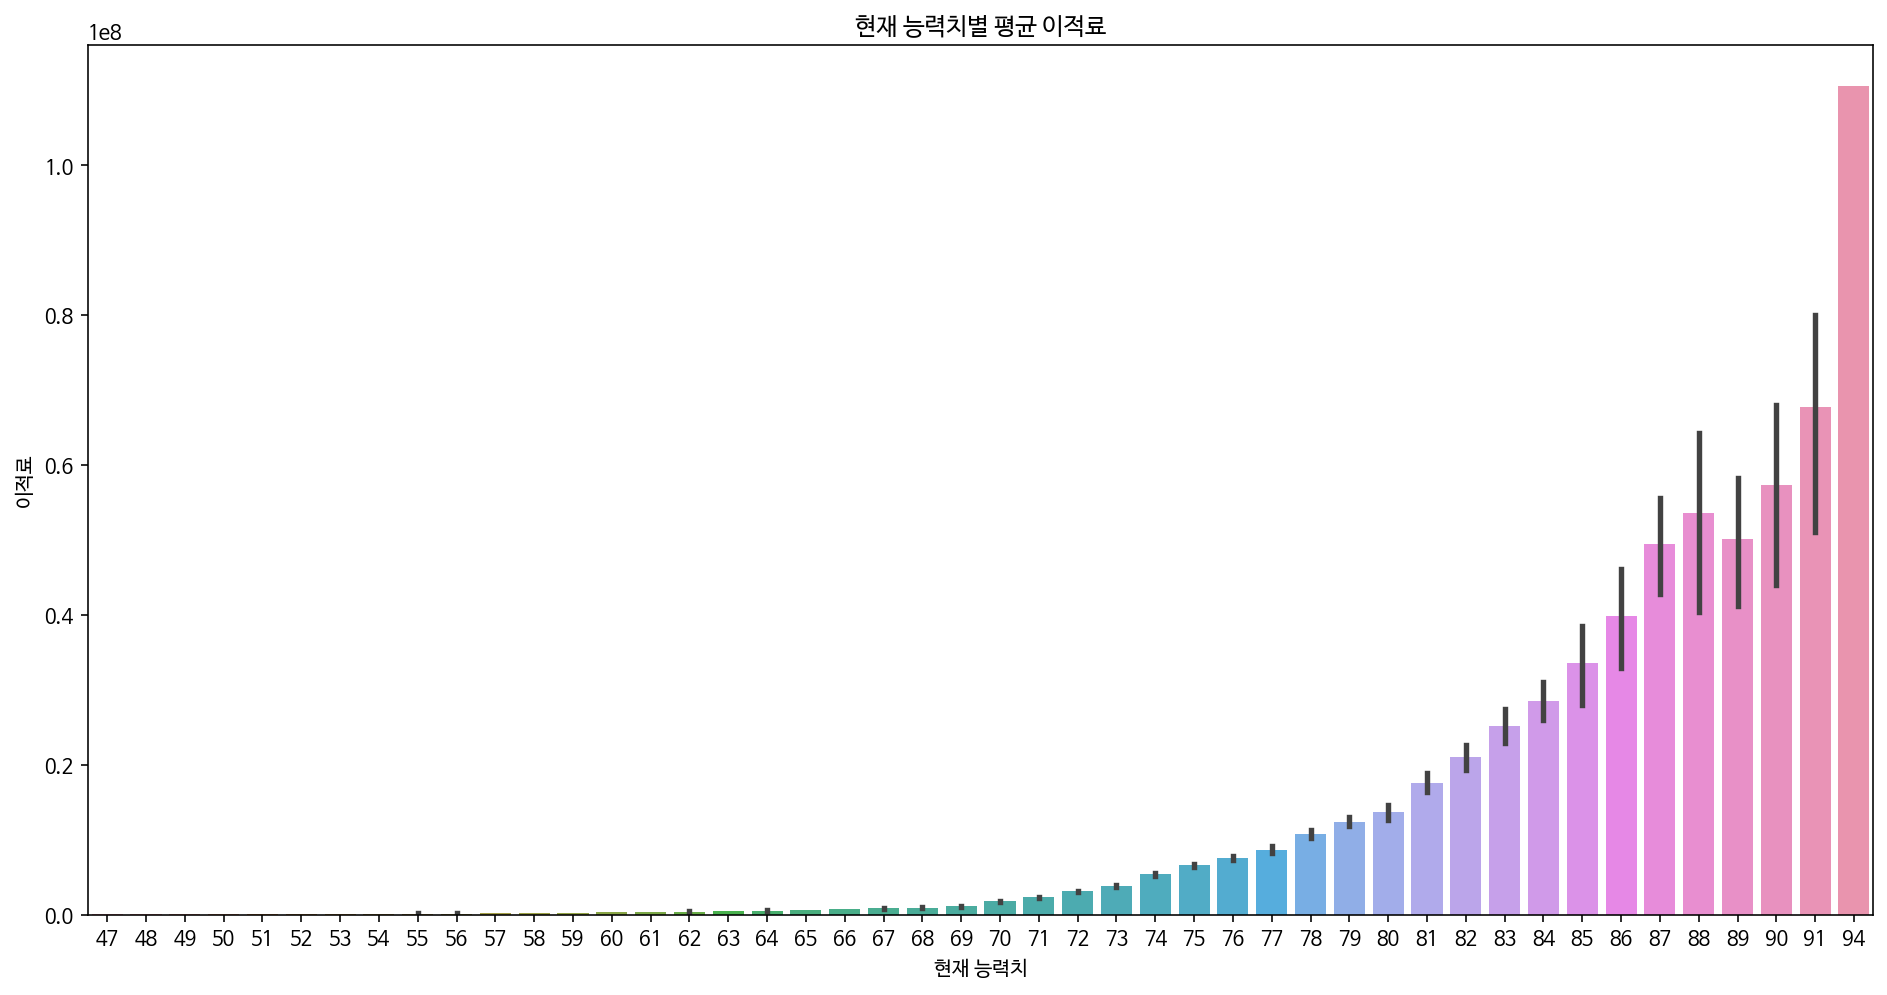

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 현재 능력치별 이적료 막대 그래프
sns.barplot(x="stat_overall", y="value", data=train)

# 설정
axe.set(title = "현재 능력치별 평균 이적료",
      xlabel="현재 능력치",
      ylabel="이적료")

### 발전 가능성별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '발정가능성'), Text(0.5, 1.0, '발정가능성별 평균 이적료')]

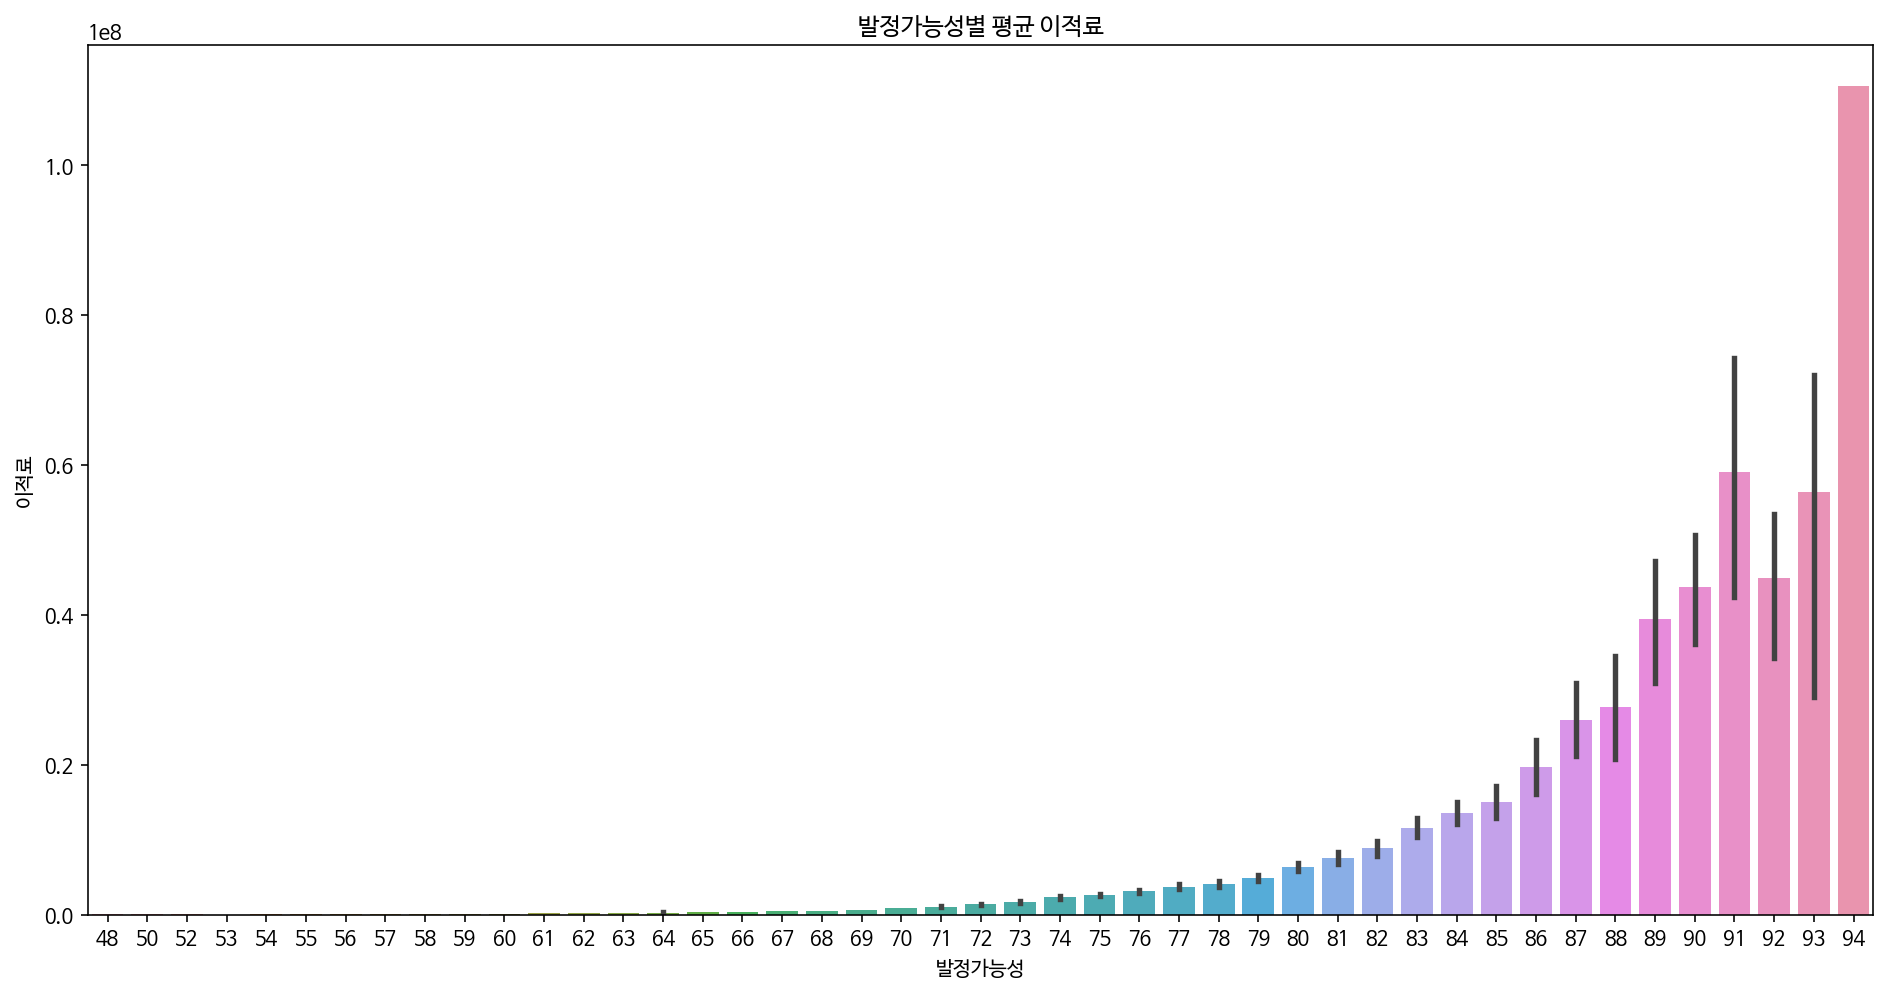

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 발전 가능성별 이적료 막대 그래프
sns.barplot(x="stat_potential", y="value", data=train)

# 설정
axe.set(title = "발전 가능성별 평균 이적료",
      xlabel="발전 가능성",
      ylabel="이적료")

### 개인 능력치별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '개인 능력치'), Text(0.5, 1.0, '개인 능력치별 평균 이적료')]

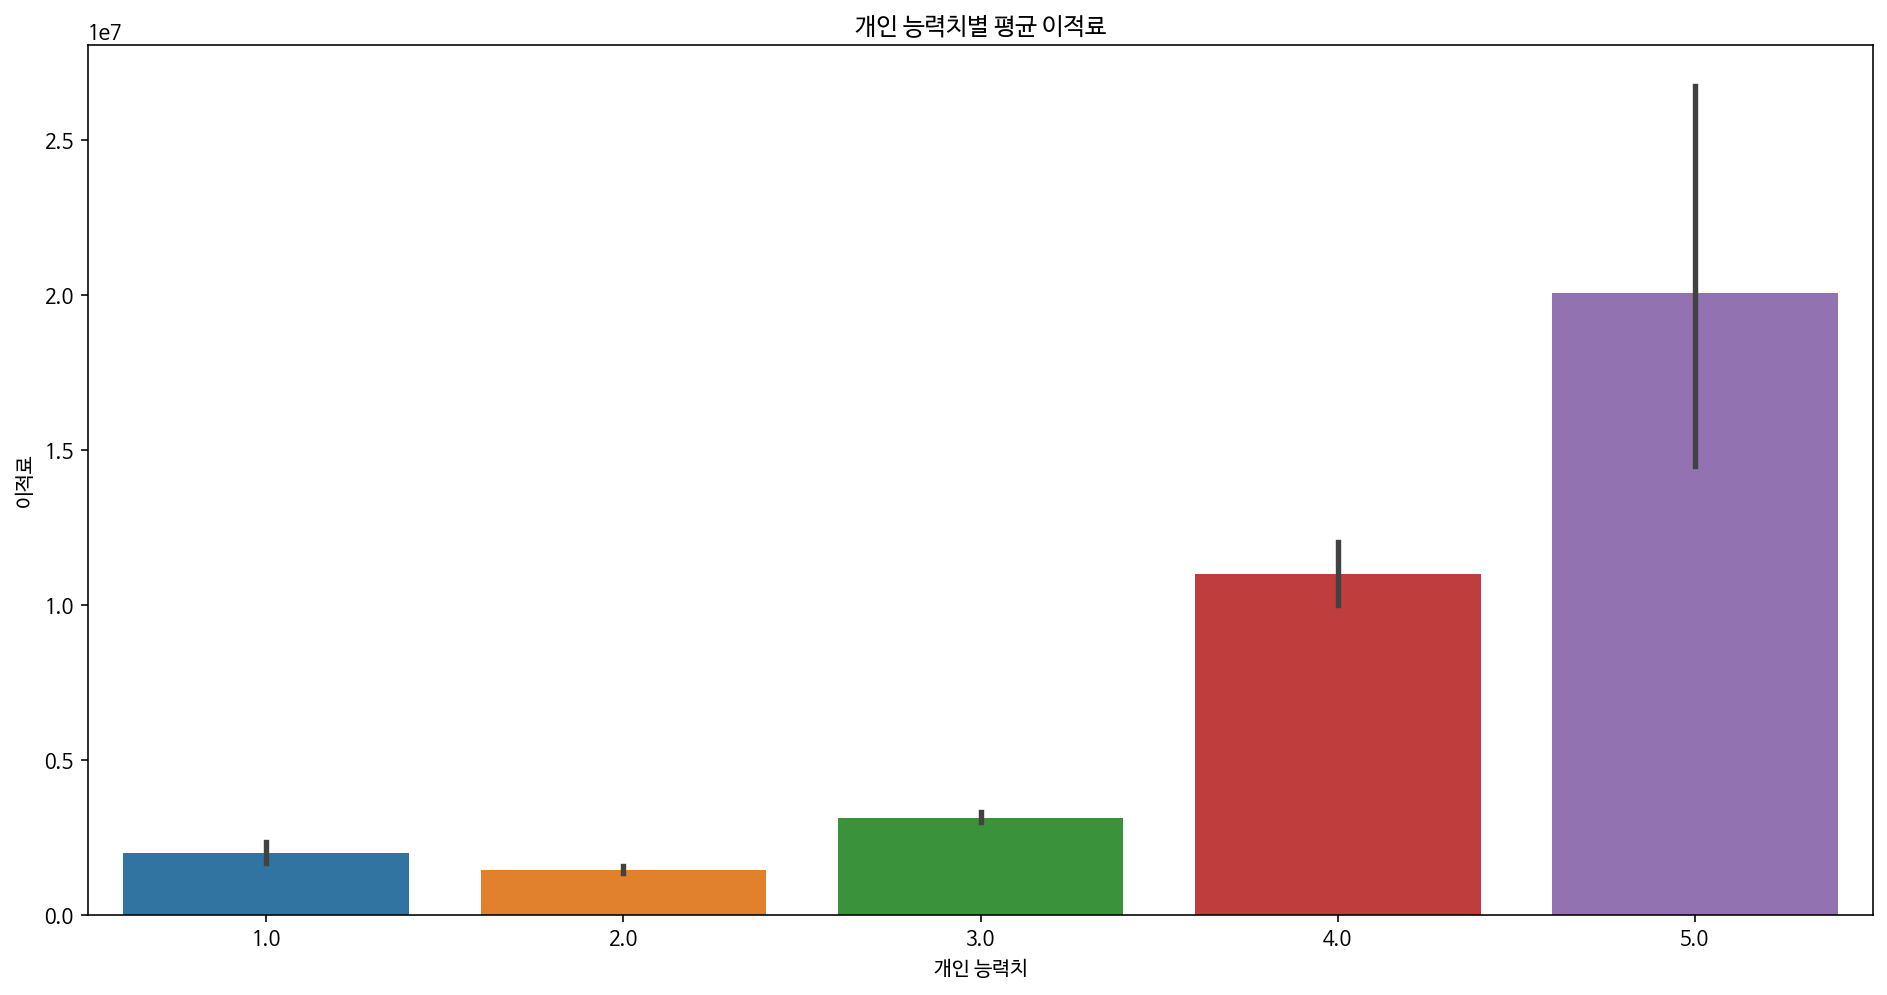

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 개인 능력치별 이적료 막대 그래프
sns.barplot(x="stat_skill_moves", y="value", data=train)

# 설정
axe.set(title = "개인 능력치별 이적료",
      xlabel="개인 능력치",
      ylabel="이적료")

### 국적별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '국적'), Text(0.5, 1.0, '국적별 평균 이적료')]

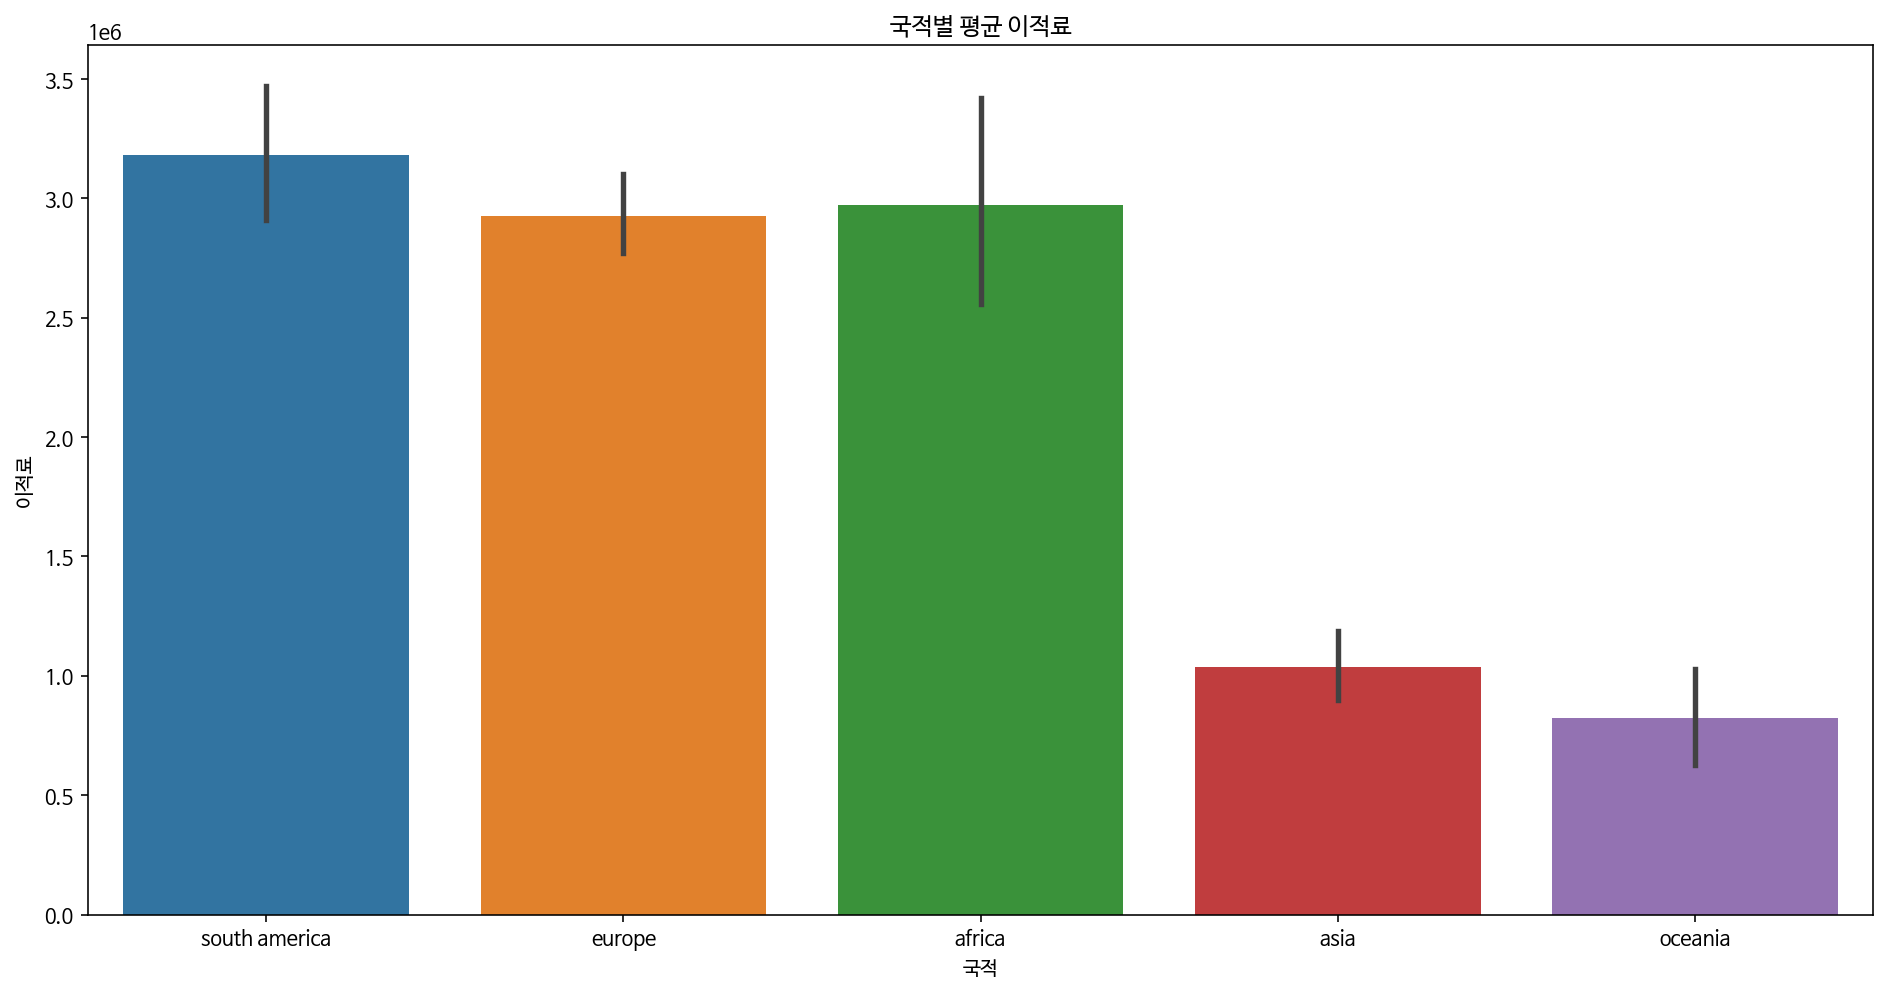

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 국적별 이적료 막대 그래프
sns.barplot(x="continent", y="value", data=train)

# 설정
axe.set(title = "국적별 이적료",
      xlabel="국적",
      ylabel="이적료")

### 포지션별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '포지션'), Text(0.5, 1.0, '포지션별 평균 이적료')]

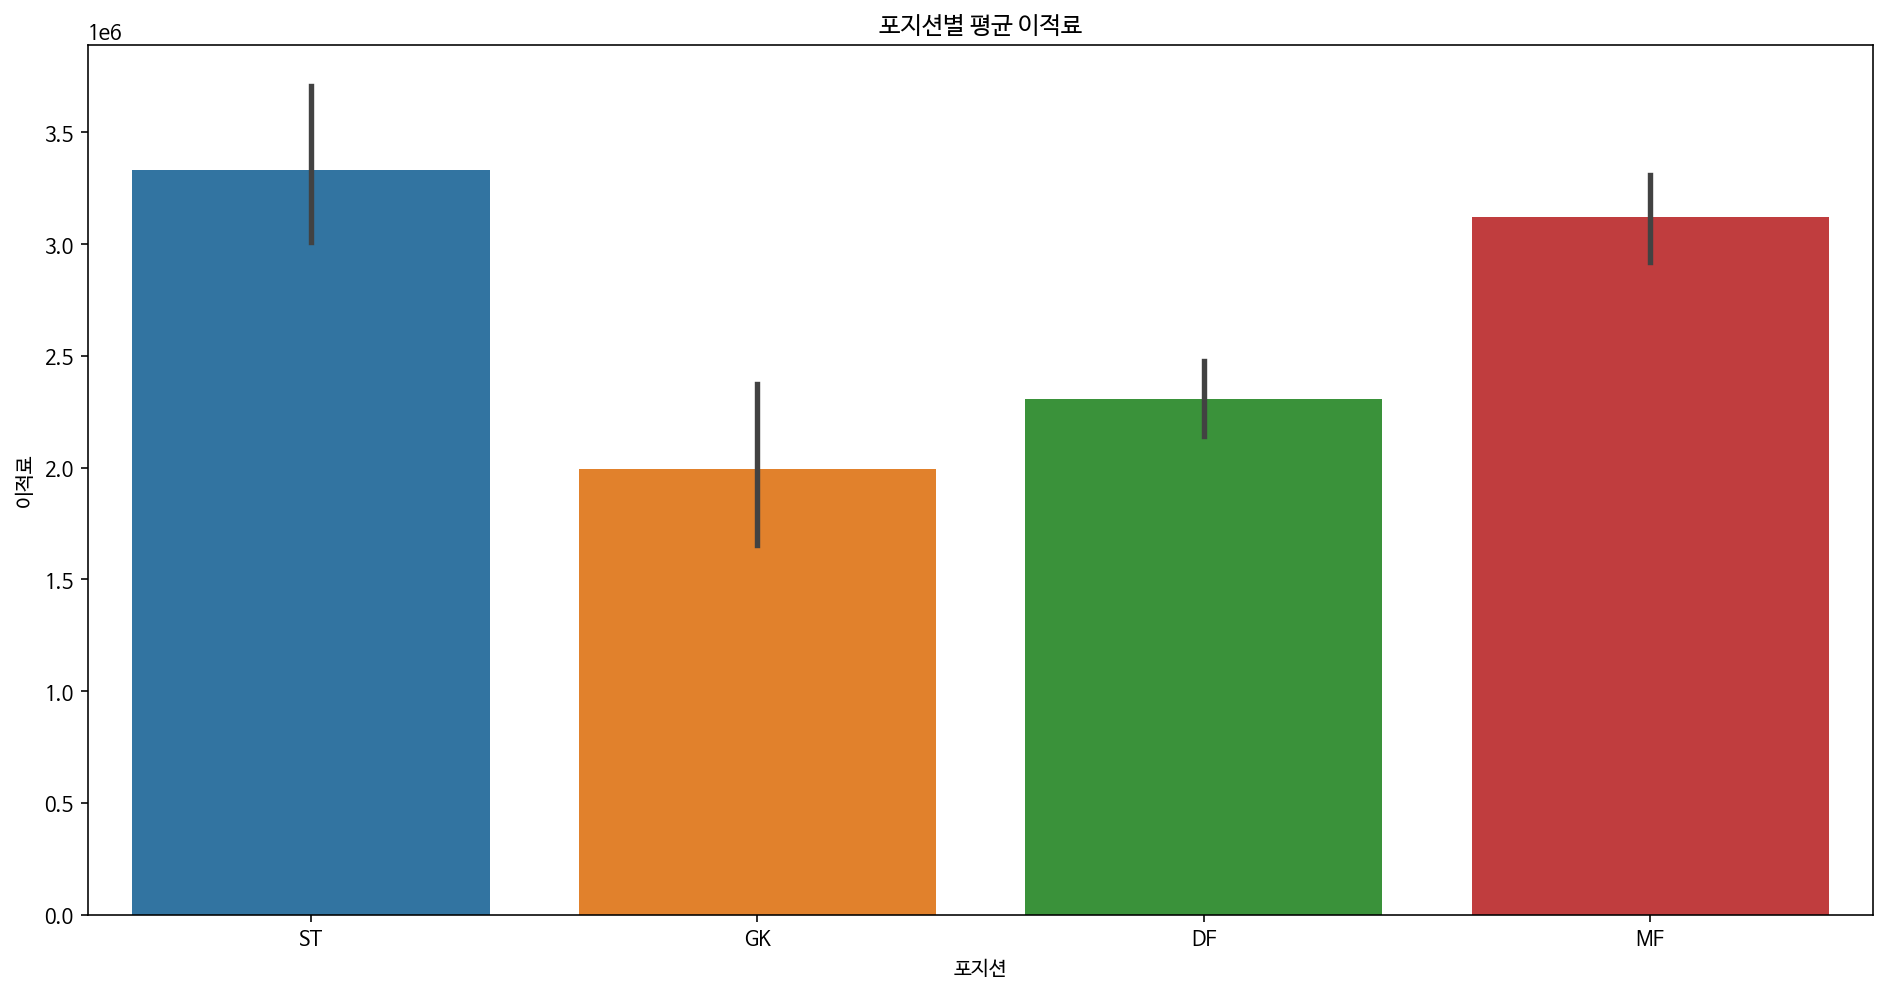

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 포지션별 이적료 막대 그래프
sns.barplot(x="position", y="value", data=train)

# 설정
axe.set(title = "포지션별 평균 이적료",
      xlabel="포지션",
      ylabel="이적료")

### 선호하는 발별 이적료

[Text(0, 0.5, '이적료'), Text(0.5, 0, '선호하는 발'), Text(0.5, 1.0, '선호하는 발별 평균 이적료')]

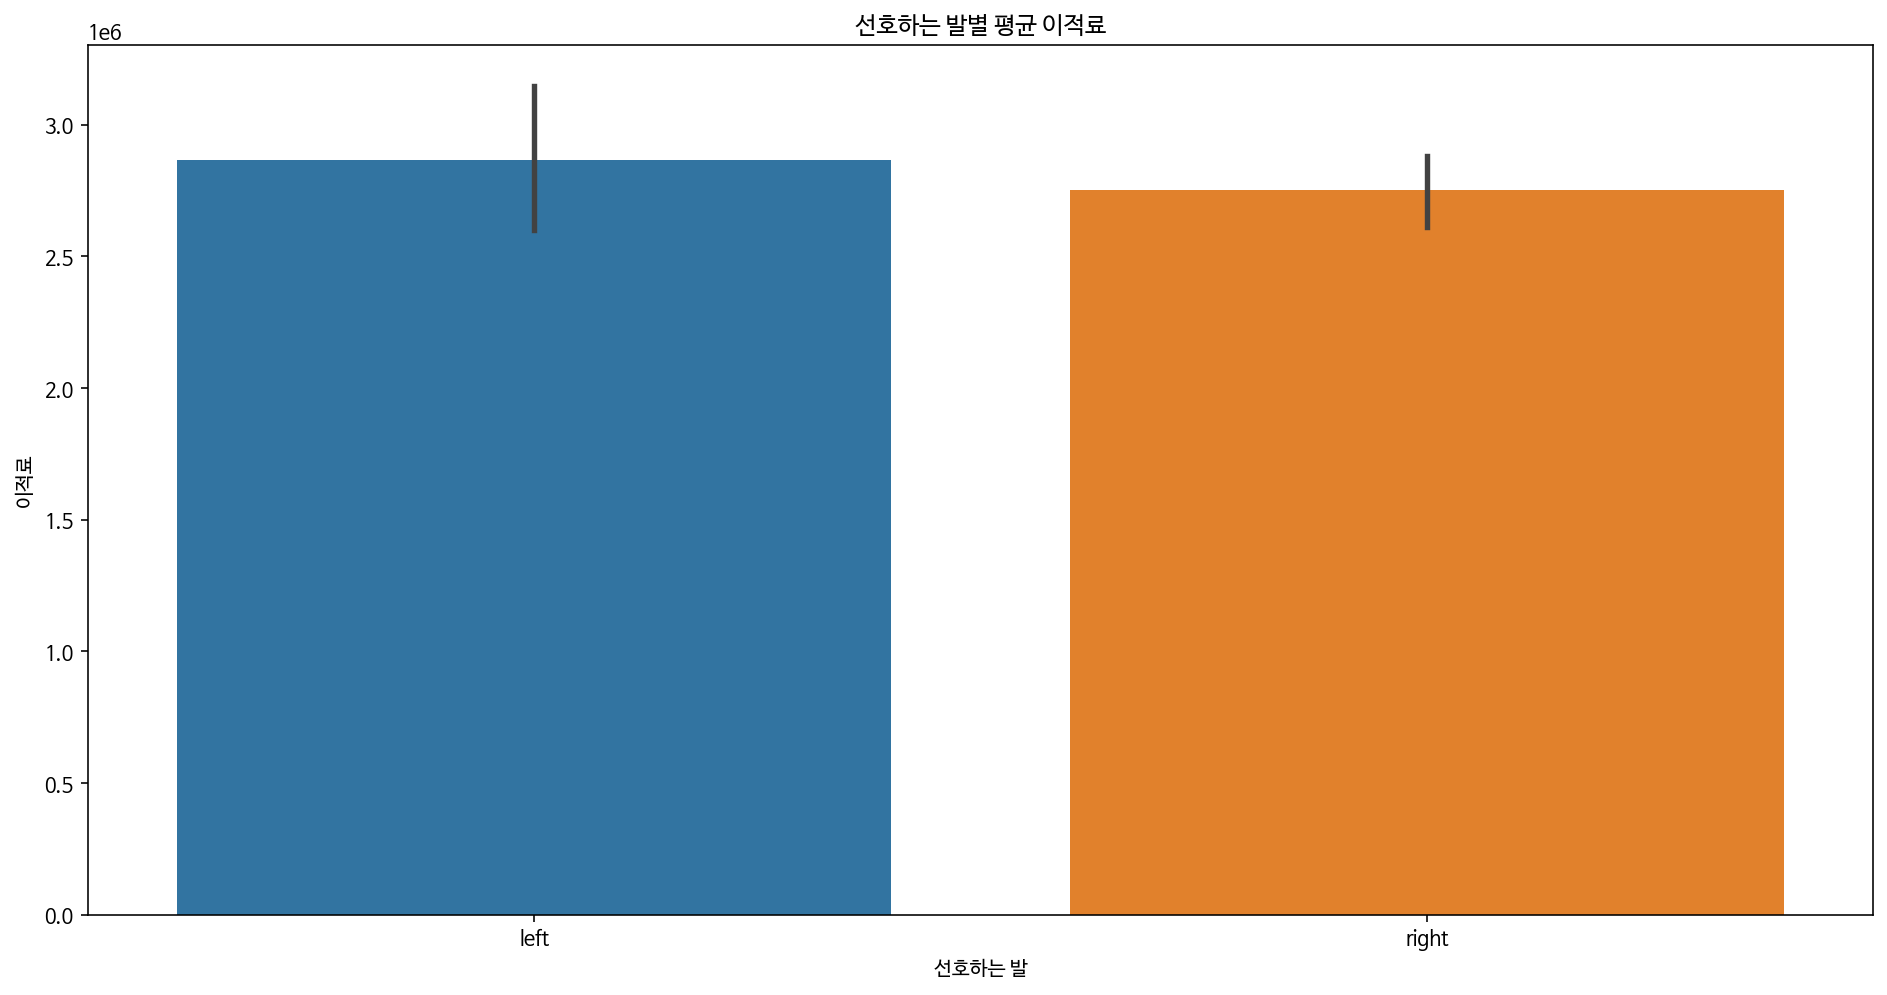

In [ ]:
# 도화지 그리기
fig, axe = plt.subplots()
fig.set_size_inches(16,8)

# 선호하는 발별 이적료 막대 그래프
sns.barplot(x="prefer_foot", y="value", data=train)

# 설정
axe.set(title = "선호하는 발별 평균 이적료",
      xlabel="선호하는 발",
      ylabel="이적료")